# DSRM Report 1

Previous film by SussexBudgetProductions failed at box office so the next film needs to make a profit to remain in business. Therefore the company requires actionable recommendation based on previous data to ensure the upcoming film will be a sucess with a given budget of 1.5million. This report will utilise a huge data set of movies and will come up with lines of action backed up by statistics and exploratory data anlysis. The key features of the movie I want to focus on are which director to use, genre of film and country of release. I will do this by initial exploratory data analysis followed by hypothesis testing and finally an actionable recommendation based on my findings.

First I import all the relevant libraries and read my datafile into a dataframe:

In [2]:

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)



# Exploratory Data Analysis

Since the aim of the next movie is to make profit, I subtract the gross amount by the budget to give us the profit of the movie. I sort the profit of the film by genre. I also include imdb score, budget and gross in the table. To examine if any of these good film genres can be made within our budget, I filtered by a maximum 1500 000.

In [3]:
#Finding profit of a film
df['profit'] = df['gross']- df['budget']
#set the maximum possible budget to 1500 000
max_budget = 1500000
topgenreseries=df.groupby('genres')['profit','imdb_score','budget','gross'].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('profit',ascending=False)
budget_genres.head()

<ipython-input-3-9f66ee7203c3>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topgenreseries=df.groupby('genres')['profit','imdb_score','budget','gross'].mean()


,profit,imdb_score,budget,gross
genres,,,,
Adventure|Family|Romance,39052600.0,6.1,500000.0,39552600.0
Adventure|Biography|Drama|Horror|Thriller,30000882.0,5.7,500000.0,30500882.0
Comedy|Documentary|Drama,11464368.0,7.3,65000.0,11529368.0
Documentary|Drama|Sport,7130611.0,8.3,700000.0,7830611.0
Documentary|History|Music,6357592.5,7.8,400000.0,6757592.5


The genre Drama appears three times in the top 5 genres that make the most profit. I would like to explore Drama genre further.


In [4]:
# Look at country where films have produced a profit and are drama films 
df.query('budget<1500000 & profit>0')[df["genres"].str.contains("Drama")].groupby(['country'])['genres'].count().reset_index()

<ipython-input-4-2cbf1f53c769>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('budget<1500000 & profit>0')[df["genres"].str.contains("Drama")].groupby(['country'])['genres'].count().reset_index()


,country,genres
0,Afghanistan,1
1,Canada,1
2,Denmark,1
3,France,2
4,India,1
5,Iran,3
6,Ireland,1
7,Italy,1
8,Romania,1
9,UK,2


After USA, the country with most number of films that has produced a profit within our budget is Iran.

# Hypotheses Testing

Based on the exploratory data analysis, my Hypotheses is that drama films released for audiences in Iran will produce a high level of profit, within the budget limit. To test this Hypothesis I will conduct a T-test. The two groups to conduct the T-test on will be mean profit of drama films produced in Iran compared to mean profit of non-drama films or films not produced in Iran. The null hypotehsis is that drama films in Iran do not produce a high profit.

In [5]:
# Only use films with budget of less than 1.5 million

df_budget = df.query('budget<1500000 & profit>0')


# df_1 contains films that are Drama and df_2 is every other film
df_1 = df_budget[df_budget["genres"].str.contains("Drama")]
df_2 = df_budget[(df_budget["genres"].str.contains("Drama") == False)]

# df_3 contains films that are Drama and produced in Iran and df_4 is every other film
df_3 = df_budget[df_budget["genres"].str.contains("Drama") & df_budget["country"].str.contains("Iran")]
df_4 = df_budget[(df_budget["genres"].str.contains("Drama") == False) | (df_budget["country"].str.contains("Iran") == False)]

In [14]:
from scipy import stats

# Calculating T-test
def T_Value(df_1, df_2):
    numerator = df_2['profit'].mean()- df_1['profit'].mean()

    denominator = np.sqrt(pow(df_1['profit'].std(),2)/len(df_1) + pow(df_2['profit'].std(),2)/len(df_2))

    t= numerator/denominator
    return t

# Or using packages 
T_drama_scipy = stats.ttest_ind_from_stats(df_2['profit'].mean(),df_2['profit'].std(),len(df_2), df_1['profit'].mean(),df_1['profit'].std(),len(df_1),equal_var=False)
T_drama_Iran_scipy = stats.ttest_ind_from_stats(df_3['profit'].mean(),df_3['profit'].std(),len(df_3), df_4['profit'].mean(),df_4['profit'].std(),len(df_4),equal_var=False)

t_drama = T_Value(df_1, df_2)
t_drama_Iran = T_Value(df_3, df_4)
print ('The T-value is:',t_drama_Iran)


# Use T-table to work out the P-value
p_value = T_drama_Iran_scipy.pvalue/2

#p_value = 0.00314
print ('The P-value is' ,p_value)
if p_value < 0.05:
    print ('Reject null hypothesis')
else:
    print('accept null hypothesis')
    

The T-value is: 3.0038298242296477
The P-value is 0.010022379783313239
Reject null hypothesis
2.285521063627696
Ttest_indResult(statistic=-3.0038298242296477, pvalue=0.020044759566626477)


I conducted the T-test using my own calculations and the scipy package. They both produced the same T-value but a different P-value. Either way, both P-values have a significance below 0.05 therefore it is statistically significant.

The P-value for this hypothesis is below 0.05 therefore we can reject null hypothesis and conclude that drama films in Iran are signficantly likely to produce high levels of profit. The limitation of this connclusion is that the sample size of films made in Iran is very low (n=3).

We can now think about which director to choose from the data we have filtered out. We will display the directors on a bar chart showing Imdb score and profit.

Text(0, 0.5, 'Mean Profit')

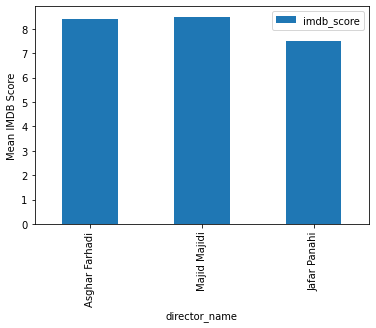

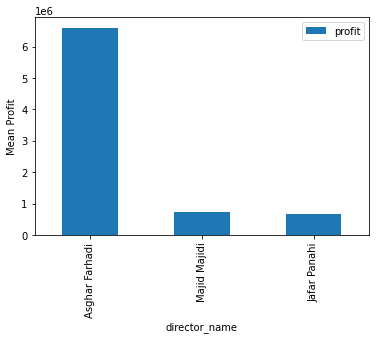

In [6]:
 # df_3 is all films that produced a profit and are drama and released in Iran
director_movies=df_3.loc[:,['director_name','movie_title']].groupby('director_name')

#make a new dataframe indexed by director which stores director and counts of movie titles
movie_counts=director_movies.count().reset_index('director_name')

#change column name to reduce confusion
movie_counts.columns = ['director_name','number_of_movies']


# Top directors only show the top 1% of directors by number of movies made
#n=np.percentile(list(movie_counts['number_of_movies']),99)



#Top directors that produce more than 1 film
movie_counts = movie_counts[movie_counts['number_of_movies']>=1]



#put into object containing the top director by name
movie_x_dir = movie_counts['director_name']

# All directors that have made a profit and made more than 1 film
df_director = df_3[df_3.director_name.isin(movie_x_dir)]

# BoxPlots showing all directors that have made a profit and 

big_director_df = df_director.loc[:,['director_name','imdb_score']]
ax2=big_director_df.plot.bar(x='director_name', y='imdb_score')
ax2.set_ylabel("Mean IMDB Score")


big_director_df = df_director.loc[:,['director_name','profit']]
ax1=big_director_df.plot.bar(x='director_name', y='profit')
ax1.set_ylabel("Mean Profit")


Out of the three directors, Asghar Farhadi has very high IMDB score and the highest profit level. 

## Recomendation 

My recommendation would be to make a drama film in Persian which is released for audiences in Iran with the director Asghar Farhadi.

# Summary

The purpose of this task was to provide actionable recommendation for an upcoming film with SussexBudgetProductions. Considering, previous films have not gone too well financially, I wanted to ensure that this recommendation provides an astute action plan which carefully considers the companies finances. Therefore when examining the imdb data, the first step involved filtering films with a maximum budget of 1500000. I also knew that profit of film and imdb score were key variables to measure which indicates the success of the film. 

I examined the genre of the film that was well rated, within our budget and was likely to make a profit. I recognised that the genre drama met all these criterias therefore I decided to further investigate this genre. I also noticed that Iran had a few drama films that met our criteria and were well rated. Therefore my hypothesis compared the profit of Drama films in Iran to other films. The results showed significance (p<0.05) however there were only 3 films that met the criteria and it was compared to a broad range of other films (unequal sample sizes). I think more data is required for me to make an accurate conclusion on the likelihood of its success. 

Based on my data analysis I may recommend SussexBudget production to make a Persian film in the genre of drama and releasing it for the Iranian market with the director Asghar Farhadi. However I think this report is preliminary data since I do not think I have enough data to be confident about my recommendation. Therefore I would like to collect more data from the Iranian film industry to further validate my recommendation. From the current data, I don't think its the best course of action to choose this recommendation. 
